# Random Forests

PCA (Principal Component Analysis) ist eine Technik zur Dimensionsreduktion, die verwendet wird, um die Anzahl der Variablen in einem Datensatz zu reduzieren, während die wichtigsten Informationen beibehalten werden. Hier ist eine kurze Übersicht darüber, was PCA macht:  
Zentrieren der Daten: Die Daten werden so transformiert, dass der Mittelwert jeder Variablen null ist.
Berechnung der Kovarianzmatrix: Die Kovarianzmatrix der zentrierten Daten wird berechnet, um die Beziehungen zwischen den Variablen zu verstehen.
Eigenwertzerlegung: Die Eigenwerte und Eigenvektoren der Kovarianzmatrix werden berechnet. Die Eigenvektoren repräsentieren die Richtungen der größten Varianz (die Hauptkomponenten), und die Eigenwerte geben die Varianzmenge an, die von jeder Hauptkomponente erklärt wird.
Projektion der Daten: Die ursprünglichen Daten werden auf die neuen Achsen (Hauptkomponenten) projiziert, um die reduzierten Dimensionen zu erhalten.



1. Import necessary libraries.
2. Load the dataset.
3. Standardize the features.
4. Apply PCA for feature reduction.
5. Transform the dataset using the PCA components.
6. Plot the explained variance ratio to determine the number of components.

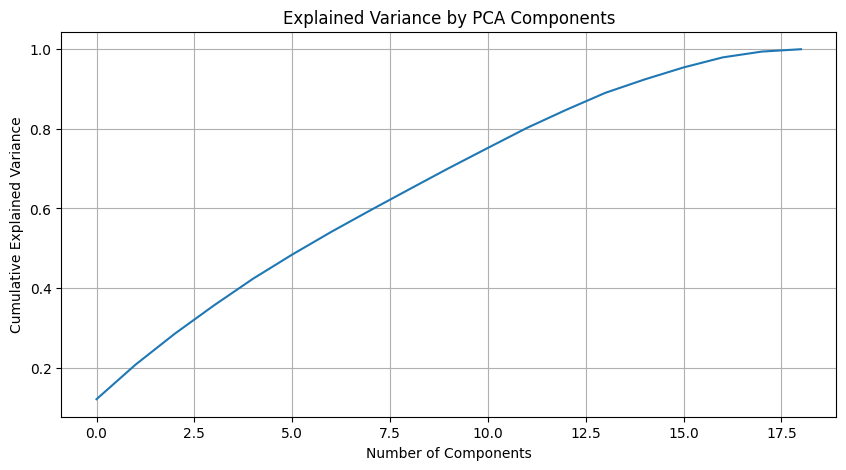

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
# Assuming `data` is a pandas DataFrame containing the dataset
data = pd.read_csv('../data/train_data_2024-08-01.csv')

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA() # n_componenents = Number of components to keep. if n_components is not set all components are kept
pca.fit(scaled_data)

# Transform the dataset using the PCA components
pca_data = pca.transform(scaled_data)

# Plot the explained variance ratio
# Die Ausgabe zeigt die kumulative Summe der Varianzerklärungen für jede Hauptkomponente. 
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [26]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score


Das Ergebnis der PCA ist ein zweidimensionaler Datensatz, der aus den Hauptkomponenten besteht.


In [27]:
pca_data

array([[ 3.16539065, -1.08077619,  2.24979027, ...,  0.58959006,
        -0.07473596, -0.0179771 ],
       [-0.96354691,  0.3691188 ,  0.29414199, ..., -1.08994314,
        -0.58987066, -0.36494479],
       [-1.0214237 , -0.08925631,  1.69111568, ...,  0.11489212,
         0.22813807, -0.24513098],
       ...,
       [-1.55381342, -0.68492416, -0.93164539, ..., -0.39080831,
        -0.61980831,  0.23207936],
       [ 2.06869035,  2.43758723, -1.1388483 , ...,  0.17080066,
        -0.65650716,  0.72490779],
       [ 1.84423789,  1.04201934, -0.30994404, ...,  0.0229687 ,
        -0.67888634, -0.52845027]])

In [28]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.12091913 0.08704587 0.077505   0.07102229 0.06712339 0.06064115
 0.05713495 0.0542616  0.05306654 0.05256826 0.05087646 0.05035207
 0.0452697  0.04267561 0.03353374 0.03028329 0.02523636 0.01457161
 0.00591296]
